In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


Constante elástica del muelle (k): 1.87 N/m
Coeficiente de correlación (R²): 0.999


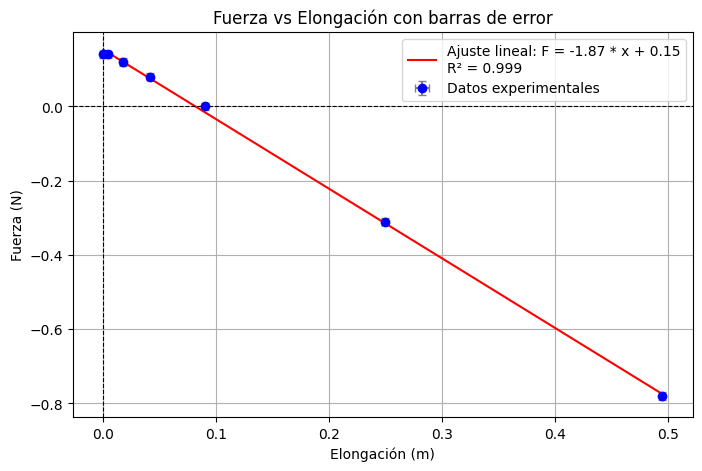

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos
grams = np.array([1, 2, 5, 10, 20, 50, 100])*1e-3  # masa (kg)
y = np.array([0.617, 0.613, 0.600, 0.576, 0.527, 0.368, 0.122])  # posición (m)
force = np.array([0.14, 0.14, 0.12, 0.08, 0.00, -0.31, -0.78])  # fuerza (N)

elongation = y[0] - y  # Elongación

# Errores
dy = 0.001  # Error en posición
dforce = 0.01  # Error en fuerza

# Ajuste lineal (F = -k * x)
slope, intercept, r_value, p_value, std_err = linregress(elongation, force)
k = -slope  # Constante elástica
r_squared = r_value**2  # Coeficiente de determinación

# Representación gráfica con barras de error
plt.figure(figsize=(8, 5))
plt.errorbar(elongation, force, xerr=dy*2, yerr=dforce, fmt='o', color="blue", label="Datos experimentales", ecolor="gray", capsize=3)
plt.plot(elongation, slope * elongation + intercept, color="red", label=f"Ajuste lineal: F = {slope:.2f} * x + {intercept:.2f}\nR² = {r_squared:.3f}")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Fuerza vs Elongación con barras de error")
plt.xlabel("Elongación (m)")
plt.ylabel("Fuerza (N)")
plt.legend()
plt.grid(True)

# Imprimir resultados
k_value = f"Constante elástica del muelle (k): {k:.2f} N/m"
r_squared_value = f"Coeficiente de correlación (R²): {r_squared:.3f}"
print(k_value)
print(r_squared_value)

# Cálculo del error de la pendiente manualmente

# Promedio de los valores de elongación
x_mean = np.mean(elongation)

# Residuales (diferencia entre los valores observados y los predichos por la recta de ajuste)
residuals = force - (slope * elongation + intercept)

# Error estándar de los residuos
sigma = np.sqrt(np.sum(residuals**2) / (len(elongation) - 2))

# Error estándar de la pendiente
delta_k = sigma / np.sqrt(np.sum((elongation - x_mean)**2))

sigma, delta_k

# Mostrar la gráfica
plt.show()
